### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [4]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

In [5]:
tf.__version__

'1.12.0'

### Collect Data

In [7]:

from tensorflow import keras



In [9]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()


4423680/4422102 [==============================] - 1s 0us/step


In [10]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [11]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
First 5 examples now are:  [9 0 0 3 0]


In [12]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [15]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

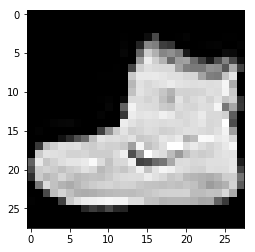

In [38]:
#Lets print the image as well
import matplotlib.pyplot as plt

plt.imshow(trainX[0],cmap='gray')


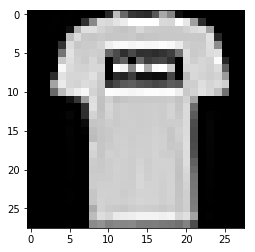

In [39]:
plt.imshow(trainX[1],cmap='gray')

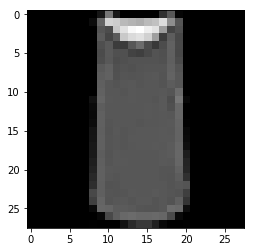

In [40]:
plt.imshow(trainX[2],cmap='gray')

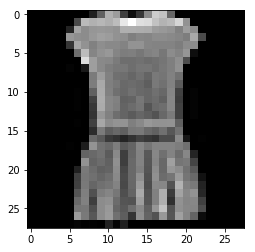

In [41]:
plt.imshow(trainX[3],cmap='gray')

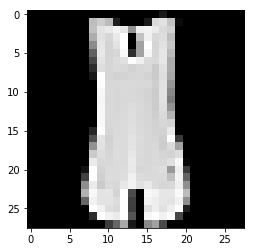

In [42]:
plt.imshow(trainX[4],cmap='gray')

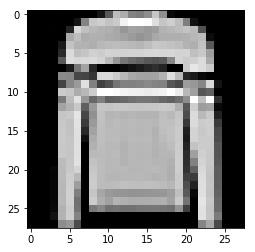

In [43]:
plt.imshow(trainX[5],cmap='gray')

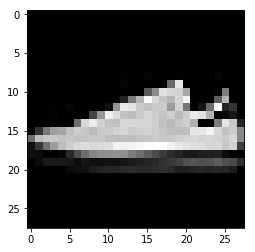

In [44]:
plt.imshow(trainX[6],cmap='gray')

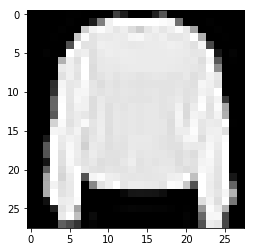

In [45]:
plt.imshow(trainX[7],cmap='gray')

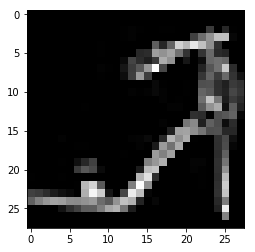

In [46]:
plt.imshow(trainX[8],cmap='gray')

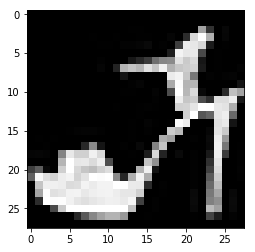

In [47]:
plt.imshow(trainX[9],cmap='gray')

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [50]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


### Execute the model using model.fit()

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [52]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 109us/step - loss: 0.5963 - acc: 0.7960 - val_loss: 0.5085 - val_acc: 0.8244
Epoch 2/30
60000/60000 [==============================] - 5s 78us/step - loss: 0.4898 - acc: 0.8314 - val_loss: 0.4918 - val_acc: 0.8309
Epoch 3/30
60000/60000 [==============================] - 4s 73us/step - loss: 0.4682 - acc: 0.8394 - val_loss: 0.4859 - val_acc: 0.8311
Epoch 4/30
60000/60000 [==============================] - 4s 75us/step - loss: 0.4544 - acc: 0.8439 - val_loss: 0.4770 - val_acc: 0.8356
Epoch 5/30
60000/60000 [==============================] - 4s 75us/step - loss: 0.4468 - acc: 0.8454 - val_loss: 0.4707 - val_acc: 0.8390
Epoch 6/30
60000/60000 [==============================] - 4s 73us/step - loss: 0.4433 - acc: 0.8483 - val_loss: 0.4758 - val_acc: 0.8379
Epoch 7/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.4377 - acc: 0.8483 - val_loss: 0.4647 - val_ac

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [53]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd_optimizer, loss='mse')

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [55]:
#Add Dense Layer which provides 100 Outputs after applying softmax
model.add(tf.keras.layers.Dense(100, activation='softmax'))
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Comile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
#Add Dense Layer which provides 100 Outputs after applying softmax
model.add(tf.keras.layers.Dense(100, activation='softmax'))
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Comile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Comile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [62]:
#Actual Label for the first example in test dataset
print(testY[0])

#Model prediction
prediction = model.predict(testX[0:1])

#Print prediction
print(prediction[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.01004795 0.00994177 0.00993642 0.0100706  0.01002764 0.01012043
 0.00994149 0.00995793 0.01007074 0.00991445 0.01000021 0.01002486
 0.01001339 0.01017329 0.00997202 0.00987176 0.00984531 0.00993446
 0.01005995 0.0100018  0.01002688 0.01005108 0.01015925 0.01003154
 0.0101225  0.009963   0.01003482 0.01011232 0.01012878 0.01009775
 0.00992734 0.00984764 0.01007438 0.00987541 0.00991068 0.0098887
 0.0100904  0.00998983 0.01000394 0.00997784 0.00978153 0.00995073
 0.01008988 0.00993756 0.00998716 0.00989528 0.01004197 0.00993324
 0.00988172 0.00990127 0.00995385 0.010076   0.01005415 0.00988955
 0.01000746 0.00995575 0.00996774 0.00998601 0.01002539 0.0101034
 0.0099513  0.00981733 0.00991341 0.01001635 0.01001762 0.00987902
 0.01002343 0.00990992 0.01001922 0.01010206 0.00995569 0.00992165
 0.00988152 0.01019126 0.01006173 0.00993704 0.01022136 0.00993365
 0.0100154  0.01009957 0.01007796 0.01004493 0.00994532 0.00981315
 0.00998756 0.01010561 0.0099338

In [63]:
import numpy as np

#Get predicted number with highest probability
predicted_num = np.argmax(prediction[0])

#Print the number
print(predicted_num)

76


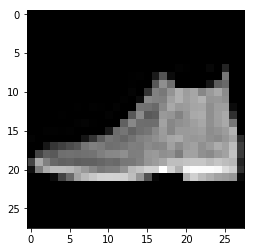

In [64]:
#Lets print the image as well
import matplotlib.pyplot as plt

plt.imshow(testX[0],cmap='gray')